In [5]:
# defining instance
import numpy as np
# from KP_old import KnapsackProblem
from KP import KnapsackProblem, find_root

## Dynamical Programming for KP Partition Function 

**(August 26, 2022)**

We have a KP instance defined by a vector of values $\textbf{v} = (v_1, \ldots, v_N)$, a vector of weights $\textbf{w} = (w_1, \ldots, w_N)$ and a weight limit $W$. The partition function $Z_N(\beta \textbf{v}, \textbf{w}, W)$ (at inverse temperature $\beta$) for the KP obeys the recursive identity 

\begin{equation}
Z_N(\beta \textbf{v}, \textbf{w}, W)  = Z_{N-1}^{(N)}(\beta \textbf{v}, \textbf{w}, W) + e^{\beta v_N}Z^{(N)}_{N-1}(\beta \textbf{v}, \textbf{w}, W-w_N),
\label{eq:dynamic_prog}
\end{equation}

where $Z^{(N)}_{N-1}(\beta \textbf{v}, \textbf{w}, W)$ is the partition function for which the $N$th component is eliminated from both $\textbf{v}$ and $\textbf{w}$, and thus only $N-1$ items are under consideration. The above identity is tantamount to a dynamic programming solution to the KP partition function. In dynamic programming we build up the solution to a problem by writing said solution in terms of the stored solutions of sub-problems. Similarly the identity shows that we can build up the partition function for the main KP instance by writing it as the sum of partition functions for sub-instances. 

The partition function in turn allows us to determine the occupancy of object $j$ in the knapsack: We have

\begin{equation}
X_j  = 1 - \lim_{\beta\to\infty}\frac{Z_{N-1}^{(j)}(\beta\textbf{v}, \textbf{w}, W)}{Z_{N} (\beta\textbf{v}, \textbf{w}, W)},
\label{eq:XsolnSimp}
\end{equation}

where $Z^{(j)}_{N-1}(\beta \textbf{v}, \textbf{w}, W)$ is the partition function for which the $j$th component is eliminated from both $\textbf{v}$ and $\textbf{w}$. For numerical implementations, we generally cannot take $\beta\to \infty$ without overflow errors, so we will simply take $\beta$ to be large and finite (or $T$ to be small) after which we will threshold the result for $X_j$ to get a binary prediction.


### Knapsack Instance

In the following examples, we will use the item list, weights, values, and weight limits given as follows. These values are taken from the problem statement in [RossettaCode Knapsack: 0-1](https://rosettacode.org/wiki/Knapsack_problem/0-1)

In [6]:
items = (
    ("map", 9, 150), ("compass", 13, 35), ("water", 153, 200), ("sandwich", 50, 160),
    ("glucose", 15, 60), ("tin", 68, 45), ("banana", 27, 60), ("apple", 39, 40),
    ("cheese", 23, 30), ("beer", 52, 10), ("suntan cream", 11, 70), ("camera", 32, 30),
    ("t-shirt", 24, 15), ("trousers", 48, 10), ("umbrella", 73, 40),
    ("waterproof trousers", 42, 70), ("waterproof overclothes", 43, 75),
    ("note-case", 22, 80), ("sunglasses", 7, 20), ("towel", 18, 12),
    ("socks", 4, 50), ("book", 30, 10),
    )

# defining weight and value vectors and weight limit
weight_vec = np.array([item[1] for item in items])
value_vec = np.array([item[2] for item in items])
Wlimit = 400

# defining instance of problem
KP_camping = KnapsackProblem(weights = weight_vec, values = value_vec, limit = Wlimit)

In [7]:
soln = KP_camping.exact_z_algorithm()

In [8]:
def knapSack_dp(W, weights, values):
    N = len(weights)
    K = [[0 for x in range(W + 1)] for x in range(N + 1)]
 
    # Build table K[][] in bottom up manner
    for i in range(N + 1):
        for w in range(W + 1):
            if i == 0 or w == 0:
                K[i][w] = 0
            elif weights[i-1] <= w:
                K[i][w] = max(values[i-1]
                          + K[i-1][w-weights[i-1]], 
                              K[i-1][w])
            else:
                K[i][w] = K[i-1][w]
 
    return K[N][W]

In [9]:
knapSack(Wlimit, weight_vec, value_vec )

NameError: name 'knapSack' is not defined

In [10]:
type([4,4,4]) == list

True

In [116]:
# def part_func(beta, W, weights, values):
#     N = len(weights)
    
#     if type(weights) != list:
#         weights = list(weights)
    
#     if type(values) != list:
#         values = list(values)  

#     Z = [[1 for x in range(W + 1)] for x in range(N + 1)]

#     for i in range(N + 1):

#         for w in range(W + 1):
#             if i == 0 or w == 0:
#                 Z[i][w] = 1

#             elif weights[i-1] <= w:
#                 Z[i][w] = Z[i-1][w] + np.exp(values[i-1]*beta)*Z[i-1][w-weights[i-1]]

#             else:
#                 Z[i][w] = Z[i-1][w]


    
#     return Z[N][W]

In [173]:
np.sum(value_vec)/np.log(1.797693e308)

1.792097746293673

In [170]:
np.log(1.797693e308)

709.7827128183643

In [179]:
round()

TypeError: round() missing required argument 'number' (pos 1)

In [183]:
# np.ones(10)[:].pop(4)

In [34]:
# first version of algorithm
def X_Zsoln(W, weights, values, rounded=True):
    '''
    Computes the exact partition function for the KP 
    using dynamical programming and then uses this solution
    to write the solution to the KP.
    
    '''
    
    # defining temperature as lowest as possible
    T = np.sum(values)/np.log(1.797693e308)
    
    # number of possible items
    N = len(weights)
    
    # empty list for solutions
    X = [0 for x in range(N)]
    
    # converting to lists if arrays
    if type(weights) != list:
        weights = list(weights)    
    if type(values) != list:
        values = list(values)
    
    # assembling solution
    for idx in range(N):
        
        # copying weight and value vector
        w_vec, v_vec = weights[:], values[:]
        
        # getting desired element
        wt, val = w_vec[idx], v_vec[idx]
        
        # reordering weight and value vectors to put chosen 
        # index element at the end        
        w_vec.pop(idx)
        w_vec.append(wt)
        
        v_vec.pop(idx)
        v_vec.append(val) 

        # defining empty partition function matrix
        Z = [[1 for x in range(W + 1)] for q in range(N + 1)]

        # implementing recursion identity 
        for i in range(N + 1):

            for w in range(W + 1):
                if i == 0 or w == 0:
                    Z[i][w] = 1
                    
                else:
                    # final factor ensures second term is zero for negative weights
                    Z[i][w] = Z[i-1][w] + np.exp(v_vec[i-1]/T)*Z[i-1][w-w_vec[i-1]]*(w-w_vec[i-1]>=0)                 
                    
        # Using solution identity
        X[idx] = 1-Z[N-1][W]/Z[N][W]
    
    if rounded:
        X =  [round(elem) for elem in X]
    
    return X

In [ ]:
# second version of algorithm
def X_Zsoln_2ndversion(W, weights, values, rounded=True):
    '''
    Computes the exact partition function for the KP 
    using dynamical programming and then uses this solution
    to write the solution to the KP.
    
    '''
    
    # defining temperature as lowest as possible
    T = np.sum(values)/np.log(1.797693e308)
#     T = 1.5
    
    # number of possible items
    N = len(weights)
    
    # copying weight and value vector
    w_vec, v_vec = weights[:], values[:]

    # defining empty partition function matrix
    Z = [[1 for x in range(W + 1)] for q in range(N + 1)]

    # implementing recursion identity 
    for i in range(1, N + 1):

        for w in range(1, W + 1):

            else:
                # final factor ensures second term is zero for negative weights
                Z[i][w] = Z[i-1][w] + np.exp(v_vec[i-1]/T)*Z[i-1][w-w_vec[i-1]]*(w-w_vec[i-1]>=0)                 
    
    # computing results vector
    results = [0]*N
    w = W
    for j in range(N, 0, -1):
        # using X_j definition
        was_added = 1-Z[j-1][w]/Z[j][w] > 0.5

        if was_added:
            results[j-1] = 1
            w -= w_vec[j-1]

    return results

In [35]:
# solving KP with dynamical programming partition function
soln = X_Zsoln_test(Wlimit, weight_vec, value_vec )

In [36]:
np.dot(soln, value_vec)

1030

In [150]:
for k in range(len(soln)):
    if soln[k] == 1:
        print(items[k][0])

map
compass
water
sandwich
glucose
banana
suntan cream
waterproof trousers
waterproof overclothes
note-case
sunglasses
socks


### Running Large W Algorithm

In [4]:
soln = KP_camping.largeW_algorithm(T=1.0)
for k in range(len(soln)):
    if soln[k] == 1:
        print(items[k][0])

map
compass
water
sandwich
glucose
banana
suntan cream
waterproof trousers
waterproof overclothes
note-case
sunglasses
socks


### Plotting Potential Function

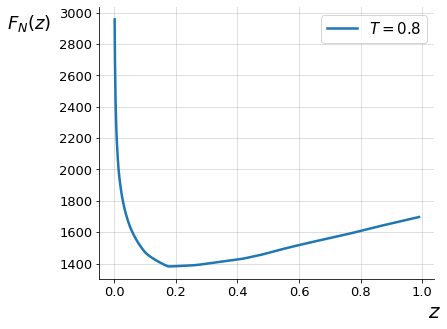

In [5]:
KP_camping.plot_potential(T = .75)

### Plotting Temperature Dependence of Value

/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/ipython_personal/LargeNKP/KP.py:238: RuntimeWarning: invalid value encountered in log
  return - self.limit*np.log(z)-np.log(1-z) + np.sum(np.log(1+z**(self.weights)*np.exp(self.values/T)))


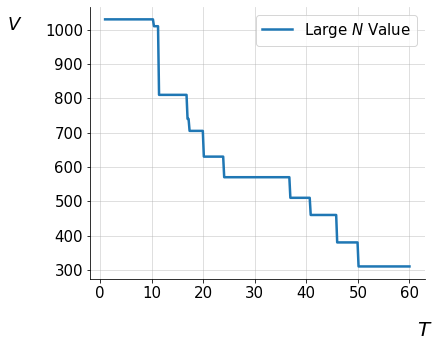

In [6]:
KP_camping.plot_value_vs_temp(temp_low=1.0, temp_high = 60.0)

### Algorithm Comparison

In [7]:
from tabulate import tabulate
from collections import defaultdict

import time

In [10]:
# dictionary of algorithm names and functions
algo_name_dict = {'Brute': KP_camping.brute_force,
                  'DP': KP_camping.knapsack01_dpV,
                  'FPTAS': KP_camping.fptas,
                  'Greedy': KP_camping.greedy,
                  'Annealing': KP_camping.simann_knapsack,
                  'Large W (T=0)': KP_camping.largeW_algorithm,
                  'Large W (T/=0)': KP_camping.largeW_algorithm}

# dictionary of algorithm names and results
results_name_dict = defaultdict(lambda: list())

for name, func in algo_name_dict.items():
    start_clock = time.time()
    if name == 'Large W (T/=0)':
        soln = func(T=1.0)
    else:    
        soln = func()    
    
    # calculating values
    tot_value = str(round(np.dot(value_vec, soln), 0))
    tot_weight = str(round(np.dot(weight_vec, soln), 0))
    time_calc = str(round(time.time()-start_clock, 5)) 
    
    # assembling results
    results_name_dict[name] = [name, tot_value, tot_weight, time_calc]
    
# creating table of results
tabular_results = []
for k, v in results_name_dict.items():
    tabular_results.append(v) 

print(tabulate(tabular_results, ["Algorithm", "Value", "Weight ", "Time (sec)"], tablefmt="grid"))

Stopping annealing because error tolerance was reached
+----------------+---------+-----------+--------------+
| Algorithm      |   Value |   Weight  |   Time (sec) |
+================+=========+===========+==============+
| Brute          |    1030 |       396 |     18.2886  |
+----------------+---------+-----------+--------------+
| DP             |    1030 |       396 |      0.00418 |
+----------------+---------+-----------+--------------+
| FPTAS          |    1030 |       396 |      0.00532 |
+----------------+---------+-----------+--------------+
| Greedy         |    1030 |       396 |      8e-05   |
+----------------+---------+-----------+--------------+
| Annealing      |     857 |       396 |      0.07015 |
+----------------+---------+-----------+--------------+
| Large W (T=0)  |    1030 |       396 |      0.0603  |
+----------------+---------+-----------+--------------+
| Large W (T/=0) |    1030 |       396 |      0.00362 |
+----------------+---------+-----------+---------